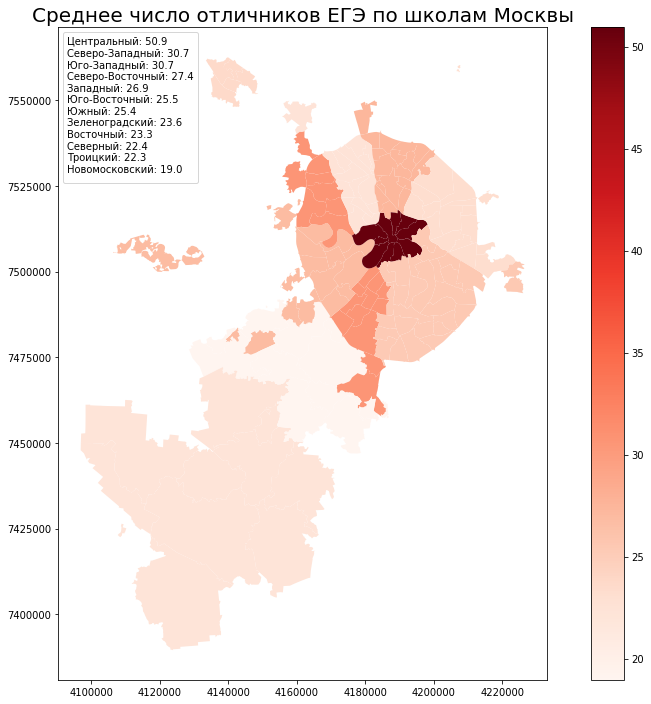

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes

data_ege = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data_ege["AdmArea"] = data_ege["AdmArea"].apply(lambda x:x.split(" ")[0])
best = data_ege.groupby("AdmArea").mean().sort_values("PASSES_OVER_220", ascending=False).reset_index()
best["Title"] = best["AdmArea"].astype(str) + ": " + round(best['PASSES_OVER_220'], 1).astype(str)

data = gpd.read_file("https://video.ittensive.com/python-advanced/moscow.json")
data = data.to_crs({'init': 'epsg:3857'})
data = pd.merge(left=data, right=best,
               left_on="NAME_AO", right_on="AdmArea", how="left")

fig = plt.figure(figsize=(16,12))
area = plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True, column="PASSES_OVER_220", cmap="Reds")
area.legend([], title="\n".join(best.Title), loc="upper left")
plt.title("Среднее число отличников ЕГЭ по школам Москвы", fontsize=20)
plt.show()